<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_K_Means_Find_K_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
#Import dataset
customer = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/cust_seg.csv')
customer.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [45]:
#Get only required variables in the df
df = customer[['Age','Edu','Years Employed','Income', 'Card Debt','Defaulted','DebtIncomeRatio']]

In [46]:
df.head()
#Explore datasett

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


In [40]:
#Check any missing variables 
df.isna().sum()


Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [57]:
#Drop rows with missing variables 
df.dropna(subset=['Defaulted'], inplace=True)


<ipython-input-57-a1025fa4975b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Defaulted'], inplace=True)


In [58]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [59]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

USE ELBOW METHOD TO DETERMINE THE NUMBER OF CLUSTERS 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'inertia')

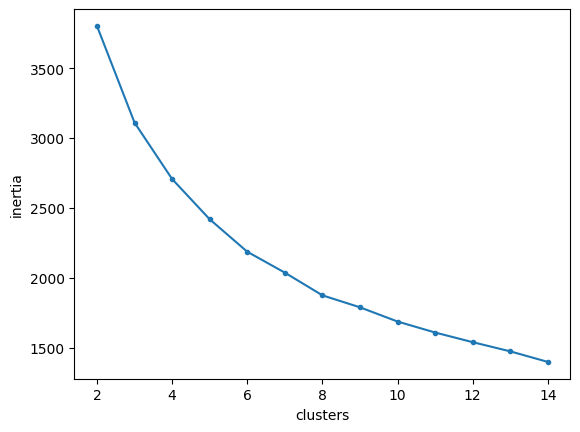

In [61]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 15 and store the inertias in the list.
for k in range(2,15): 
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

In [ ]:
#The elbow moment is between 2 and 4

USE SILHOUETTE SCORES

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

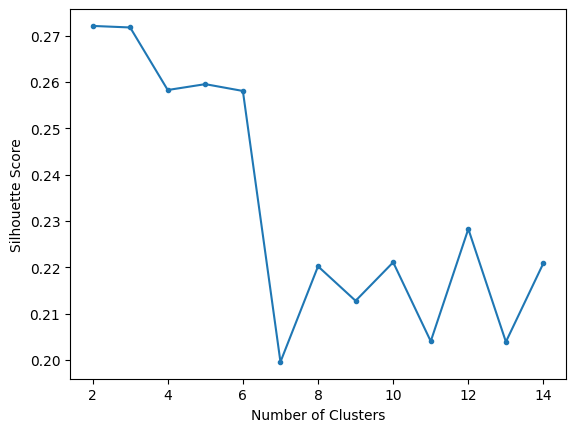

In [62]:
# USE SILHOUETTE SCORES
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 15), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [66]:
# The highest score is got at 2 clusters and next to 3 clusters

In [63]:
#Check how 2 and 3 clusters look since they have about the same silhouette score
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# It is difficult to plot the clusters as the data has multiple dimensions 